In [457]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

# 한글폰트설치
from matplotlib import font_manager, rc
import matplotlib as mpl

In [485]:
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

In [202]:
Movies = pd.read_csv('Data/Movies.csv')

In [4]:
Movies.head()

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,개봉월,개봉요일,누적상영횟수,개봉일차
0,24,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,...,994000,994000,142,142,1,1,6,Wednesday,1,1
1,12,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,...,909000,1903000,449,591,2,2,6,Wednesday,3,2
2,7,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,...,7314000,9217000,1386,1977,7,11,6,Wednesday,13,3
3,11,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,...,3950000,13167000,790,2767,6,6,6,Wednesday,17,4
4,8,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,...,2503000,15670000,1239,4006,5,5,6,Wednesday,11,5


In [562]:
# 개봉일, 기준일 타입 변경
Movies['개봉일'] = Movies['개봉일'].astype('datetime64[ns]')
Movies['기준일'] = pd.to_datetime(Movies['기준일'])

In [563]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

## 등급 전처리

In [ ]:
# 청소년관람불가
18세관람가
18세 미만인 자는 관람할 수 없는 등급
연소자관람불가
연소자관람불가,청소년관람불가
18세관람가,청소년관람불가 
18세 미만인 자는 관람할 수 없는 등급 
미성년자관람불가
제한상영가
청소년관람불가,고등학생이상관람가
청소년관람불가,12세관람가
국민학생관람불가,청소년관람불가
고등학생이상관람가,청소년관람불가

# 15세이상관람가
고등학생이상관람가,15세이상관람가
15세관람가,15세이상관람가
15세관람가
15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가
국민학생관람불가,15세이상관람가
18세관람가,15세이상관람가
연소자관람불가,15세이상관람가
15세 미만인 자는 관람할 수 없는 등급 
15세이상관람가,18세 미만인 자는 관람할 수 없는 등급
15세이상관람가,전체관람가
연소자관람가,15세이상관람가
15세이상관람가,미성년자관람불가
12세이상관람가,고등학생이상관람가(여름이야기)
청소년관람불가,15세이상관람가
15세이상관람가,중학생이상관람가

# 12세이상관람가
12세관람가 
12세 미만인 자는 관람할 수 없는 등급
12세이상관람가,12세관람가
12세이상관람가,중학생이상관람가
12세이상관람가,국민학생관람불가,15세이상관람가
12세이상관람가,전체관람가
12세이상관람가,15세 미만인 자는 관람할 수 없는 등급
미성년자관람가(챔프)
12세이상관람가,연소자관람가
12세이상관람가,15세이상관람가
15세관람가,12세이상관람가
12세이상관람가,고등학생이상관람가(하워즈 엔드)
12세이상관람가,국민학생관람불가
15세이상관람가,중학생이상관람가(토토의 천국)

# 전체관람가
모든 관람객이 관람할 수 있는 등급,전체관람가
연소자관람가
연소자관람가,전체관람가
12세이상관람가,전체관람가(도쿄 오아시스)
모든 관람객이 관람할 수 있는 등급
청소년관람불가,전체관람가
미성년자관람가(메리 포핀스)
전체관람가,중학생이상관람가
12세이상관람가,연소자관람가,전체관람가

In [327]:
# dataframe 값 변경 df.loc [ 조건, 바꿀 열이름]
Movies.loc[Movies.등급 == '15세이상관람가,중학생이상관람가','등급']  = '15세이상관람가'

In [523]:
Movies.loc[Movies.등급 == '고등학생이상관람가'].영화명.unique()

array(['CQN 한국영화앵콜전', '가면의 정사', '감옥풍운', '개그맨', '결혼 피로연', '고공침투', '고래사냥2',
       '구름 속의 산책', '국두', '귀여운 여도적', '그 섬에 가고 싶다', '글렌게리 글렌로스', '글리머 맨',
       '김의 전쟁', '까미유 끌로델', '나는 날마다 일어선다', '나는 소망한다 내게 금지된 것을', '나쁜 여자들',
       '나쁜 피', '나의 사랑, 나의 신부', '남부군', '남아있는 나날', '남자는 괴로워', '내 안에 우는 바람',
       '내 책상 위의 천사', '네 번의 결혼식과 한 번의 장례식', '넬', '노스탤지아', '노웨이 아웃', '노호광',
       '닉크', '달은...해가 꾸는 꿈', '당신이 잠든 사이에', '대통령의 연인', '대행동', '대호출격',
       '더 록', '데드맨 워킹', '델타포스2', '도범2', '동방불패', '동방불패 2', '동방삼협', '드라큐라',
       '디바', '라스트맨 스탠딩', '라파누이', '랜드 앤 프리덤', '러브 스토리', '러브 어페어', '러브앤워',
       '로미오와 줄리엣', '로잔나포에버', '리버 와일드', '마담 보봐리', '마돈나 진실 혹은 대담',
       '마이클 콜린스', '매드니스', '모스크바는 눈물을 믿지 않는다', '모험왕', '미션 임파서블', '미스틱 피자',
       '미저리', '바그다드 카페', '박봉곤 가출사건', '박철수의 헬로 임꺽정', '반고호', '백발 마녀전',
       '뱀파이어와의 인터뷰', '벅시', '복수무정', '부귀열차', '불같은 약속', '불멸의 연인', '붉은 수수밭',
       '브레이브 하트', '브로큰 애로우', '비밀과 거짓말', '빅 나이트', '빈센트', '사랑과 추억',
       '사랑을 위하여', '사랑의 용기', '사랑의 행로', '사브리나', '사선에서', '사의 찬미', '사이공',


In [330]:
Movies.loc[Movies.등급 == '중학생이상관람가'].영화명.unique()

array(['1492 콜럼버스', 'A 계획 속집', '가면속의 아리아', '가위손', '가을날의 동화', '간디', '공작왕',
       '귀주 이야기', '그랑 부르', '그래 가끔 하늘을 보자', '그린 파파야 향기', '금지된 장난',
       '기쁜 우리 젊은 날', '기연출사', '기적', '길버트 그레이프', '꼴찌부터 일등까지 우리반을 찾습니다',
       '나일의 대모험', '내 친구의 집은 어디인가', '노틀담의 꼽추', '닥터 지바고', '데이라잇', '동성서취',
       '라밤바', '레닌그라드 카우보이 미국에 가다', '레드히트', '레인맨', '로렌조 오일', '로보캅',
       '마농의 샘', '무장원 소걸아', '미세스 다웃파이어', '볼케이노', '분노의 역류', '붉은 10월',
       '비룡맹장', '비욘드 랭군', '비정성시', '빅', '사랑과 슬픔의 여로', '사랑은 지금부터 시작이야',
       '사랑의 기적', '사랑의 블랙홀', '서유기 월광보합', '서편제', '세상의 모든 아침', '소오강호',
       '솔로몬의 딸', '시티 오브 조이', '신부의 아버지', '실베스타스텔론의 탈옥', '심연', '쓰리아미고',
       '아팟치', '아폴로 13', '야반가성', '어퓨굿맨', '엄마는 해결사', '열일곱살의 쿠데타',
       '예스 마담3-중화전사', '올리브나무사이로', '완전한 세상', '작은 아씨들', '정복자 펠레', '제5원소',
       '제로니모', '차이코프스키', '천녀유혼', '천녀유혼 2-인간도', '천녀유혼 3-도도도', '첫사랑', '축제',
       '컷스로트 아일랜드', '쿼터매인', '크로커다일 던디', '크로커다일 던디2', '클리프 행어', '트윈스',
       '특전대네이비 씰', '파 앤드 어웨이', '폭풍의 질주', '폴리스 스토리', '폴리스 스토리 2 - 구룡의 눈',
       '폴리스 스토리3', '햄릿',

In [329]:
Movies.loc[Movies.등급 == '국민학생관람불가'].영화명.unique()

array(['12인의 하숙생', '1941', '가을비 우산속에', '귀타귀', '그 해 겨울은 따뜻했네', '그리스',
       '길소뜸', '깃발없는 기수', '깊은밤 깊은 곳에', '내일 또 내일', '더티 해리3-집행자',
       '더티해리 4-써든 임팩트/서든 임팩트', '델타포스', '도시로 간 처녀', '라붐 2', '로맨스 그레이',
       '로맨싱 스톤', '마지막 찻잔', '매드맥스', '매트 헌터', "미워도 다시 한번 '80",
       "미워도 다시 한번 '80 제2부", '백야', '병태와 영자', '블루스 브라더스', "빙점 '81",
       '사관과 신사', '사랑의 조건', '사랑하는 사람아', '사제출마', '살인나비를 쫓는 여자', '소권괴초',
       '스카페이스', '아가씨 참으세요', '아벤고 공수군단', '아웃 오브 아프리카', '얼굴이 아니고 마음입니다',
       '에스케이프 아테네', '에이리언 2', '엑스칼리버', '용형호제', '우상의 눈물', '위트니스', '을화',
       '이어 오브 드래곤', '이장호의 외인구단', '인도로 가는길', '족보', '죽음보다 깊은 잠', '컬러퍼플',
       '코난-바바리안', '코만도', '터미네이터', '페세이지', '호국팔만대장경', '황진이', '후릭크'],
      dtype=object)

In [345]:
Movies.groupby('등급').size().sort_values(ascending = False)

등급
15세이상관람가     165095
12세이상관람가     121099
전체관람가        101912
청소년관람불가       84271
고등학생이상관람가      1873
중학생이상관람가       1234
국민학생관람불가        534
dtype: int64

In [350]:
len(Movies.영화명.unique()),len(Movies.loc[Movies.등급 == '고등학생이상관람가'].영화명.unique()), len(Movies.loc[Movies.등급 == '중학생이상관람가'].영화명.unique()), len(Movies.loc[Movies.등급 == '국민학생관람불가'].영화명.unique())

(17768, 200, 92, 57)

### 고등학생이상관람가, 중학생이상관람가, 국민학생관람불가

'미정'으로 묶어서 '등급s'컬럼에 저장 (섞여있음)

In [412]:
Movies['등급s'] = Movies['등급']

In [413]:
Movies.loc[(Movies.등급 == '고등학생이상관람가') | (Movies.등급 == '국민학생관람불가') | (Movies.등급 == '중학생이상관람가'), '등급s'] = '미정'

In [522]:
Movies.groupby('등급s').size()

등급s
12세이상관람가    121099
15세이상관람가    165095
미정            3641
전체관람가       101912
청소년관람불가      84271
dtype: int64

In [560]:
Movies.to_csv("Data/Movies_등급수정.csv", index = False)

### 장르 탐색

In [9]:
genre = ','.join(Movies.장르)
set(genre.split(','))

{'SF',
 '가족',
 '공포(호러)',
 '기타',
 '다큐멘터리',
 '드라마',
 '멜로/로맨스',
 '뮤지컬',
 '미스터리',
 '범죄',
 '사극',
 '서부극(웨스턴)',
 '스릴러',
 '애니메이션',
 '액션',
 '어드벤처',
 '전쟁',
 '코미디',
 '판타지'}

In [10]:
len(set(genre.split(',')))

19

In [37]:
Genre = list(set(genre.split(',')))

In [83]:
# 장르 ()변환(괄호 인식이 안 됨)
Genre[7] = '서부극'
Genre[12] = '공포'

In [73]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [110]:
genre_num = []
for i in range(0,len(Genre)):
    genre_num.append(len(Movies[Movies.장르.str.contains(Genre[i])]))

In [111]:
genre_num

[20908,
 6390,
 5144,
 37171,
 70837,
 74905,
 8905,
 1643,
 27445,
 57485,
 82864,
 29458,
 19152,
 50920,
 18190,
 10312,
 245442,
 43627,
 21952]

In [112]:
df = pd.concat([pd.DataFrame(Genre), pd.DataFrame(genre_num)], axis = 1)
df.columns = ['장르','갯수']

In [116]:
df['영화비율'] = df.갯수.apply(lambda x: x/len(Movies))
df['비율'] = df.갯수.apply(lambda x: x/df.갯수.sum())

In [114]:
df.갯수.sum()

832750

In [239]:
df.sort_values('영화비율', ascending = False, inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '드라마'),
  Text(1, 0, '멜로/로맨스'),
  Text(2, 0, '코미디'),
  Text(3, 0, '액션'),
  Text(4, 0, '애니메이션'),
  Text(5, 0, '스릴러'),
  Text(6, 0, '다큐멘터리'),
  Text(7, 0, '어드벤처'),
  Text(8, 0, '판타지'),
  Text(9, 0, '범죄'),
  Text(10, 0, '가족'),
  Text(11, 0, 'SF'),
  Text(12, 0, '공포'),
  Text(13, 0, '미스터리'),
  Text(14, 0, '전쟁'),
  Text(15, 0, '뮤지컬'),
  Text(16, 0, '사극'),
  Text(17, 0, '기타'),
  Text(18, 0, '서부극')])

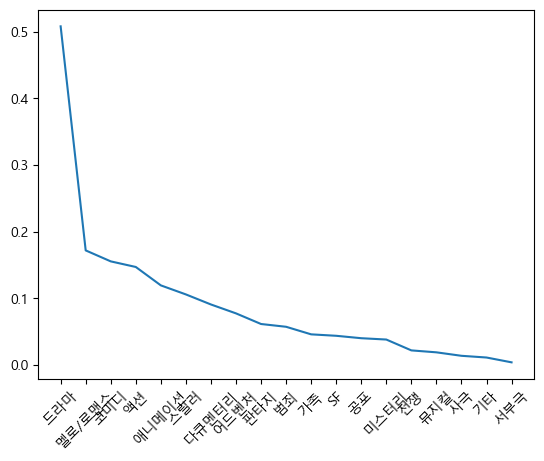

In [121]:
plt.plot(df.장르, df.영화비율)
plt.xticks(rotation = 45)

### 누적관객수

In [564]:
Movies = Movies.sort_values(['영화명','기준일'])

In [565]:
movie = Movies.영화명.unique()
len(movie)

17768

In [362]:
movie_cum = Movies.drop_duplicates('영화명', keep = 'last')

In [363]:
movie_cum.sort_values('누적관객수', ascending = False)

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,개봉월,개봉요일,누적상영횟수,개봉일차
158492,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,...,450000,135758658810,75,17615919,2,2,7,Wednesday,3,171
49195,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,...,6000,139655543516,1,16266338,1,1,1,Wednesday,2,148
266126,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,...,45000,115727528087,9,14414658,5,5,12,Wednesday,16,150
31225,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,...,576000,110947621230,96,14264478,2,2,12,Wednesday,3,236
300783,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소",...,47233940,122492181020,6668,13977602,439,587,4,Wednesday,1118,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276489,97,아름다운 시절,1998-11-21,12세이상관람가,"드라마,전쟁",한국,한국,㈜영화사 백두대간,NaN,이광모,...,0,0,0,0,1,1,11,Saturday,2,3
276494,50,아름다운 영화 상영회-그녀들의 이야기를 만나다2,2008-05-26,NaN,다큐멘터리,한국,한국,NaN,NaN,NaN,...,0,0,0,0,1,1,5,Monday,1,1
276620,50,아리랑,2003-05-30,전체관람가,드라마,한국,한국,(주)시오리엔터테인먼트,무비즈엔터테인먼트㈜,이두용,...,0,0,0,0,1,3,5,Friday,6,2
1175,65,125 전승철,2008-10-28,NaN,드라마,한국,한국,박정범,NaN,박정범,...,0,0,0,0,1,1,10,Tuesday,1,1


In [357]:
# 천만관객, 백만관객, 천, 백
len(movie_cum[movie_cum.누적관객수 >= 10000000]), len(movie_cum[movie_cum.누적관객수 >= 1000000]), len(movie_cum[movie_cum.누적관객수 <=1000]), len(movie_cum[movie_cum.누적관객수 <=100])

(26, 753, 9850, 6923)

## 등급별 비율

In [571]:
# 전체영화 등급
movie_cum = Movies.drop_duplicates('영화명', keep = 'last')
movie_cum_num = movie_cum.groupby('등급s').size()

In [572]:
# 액션영화 등급
actions = movie_cum[movie_cum.장르.str.contains('액션')]
actions_num = actions.groupby('등급s').size()

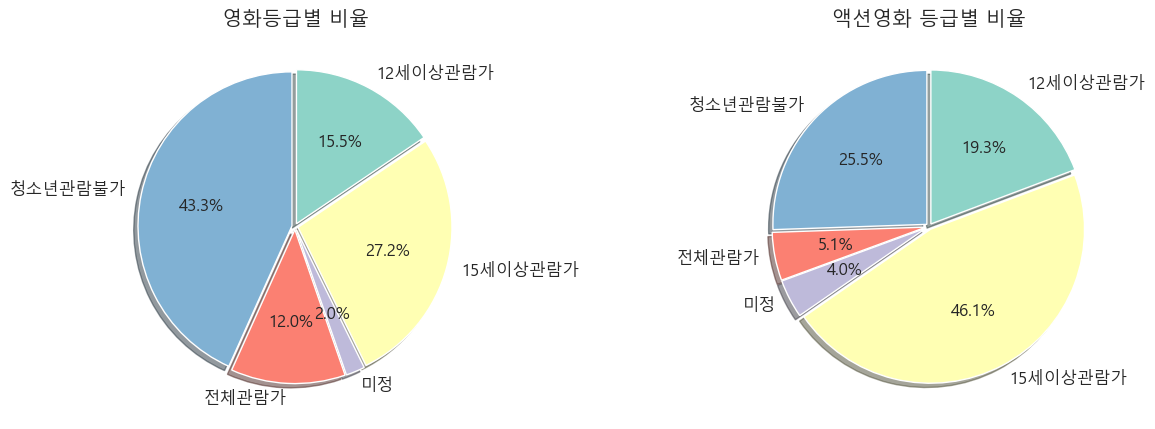

In [573]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors = sns.color_palette("Set3")
explode = [0.02, 0.02, 0.02, 0.02, 0.02]

ax1.pie(movie_cum_num.values, labels = movie_cum_num.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True, explode = explode)

ax2.pie(actions_num.values, labels = actions_num.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True, explode = explode)
ax1.set_title('영화등급별 비율')
ax2.set_title('액션영화 등급별 비율')
plt.show()

### 100만이상 영화 등급별 비교

In [574]:
# 100만이상 영화 비율
print('전체 영화의 100만이상 영화 비율: ', len(million)/len(movie_cum))
print('액션 영화의 100만이상 영화 비율: ', len(million_action)/len(movie_cum[movie_cum.장르.str.contains('액션')]))

전체 영화의 100만이상 영화 비율:  0.04237955875731653
액션 영화의 100만이상 영화 비율:  0.10826306913996628


In [575]:
# 관객수 100만 이상 영화 등급
million = movie_cum[movie_cum.누적관객수>=1000000]
million_num = million.groupby('등급s').size()

# 액션, 관객수 100만 이상 영화
million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]
million_action_num = million_action.groupby('등급s').size()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5240\3413168406.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]


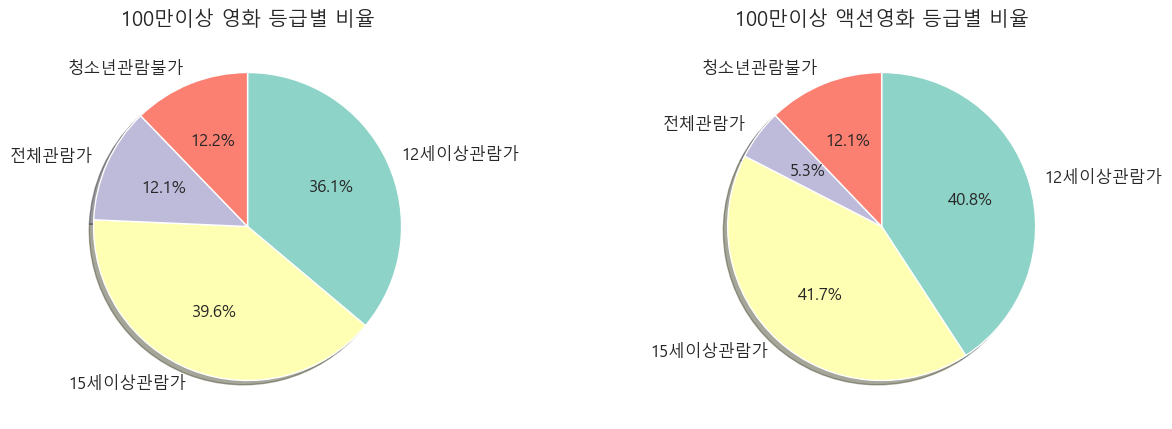

In [576]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors = sns.color_palette("Set3")

ax1.pie(million_num.values, labels = million_num.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)

ax2.pie(million_action_num.values, labels = million_action_num.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)
ax1.set_title('100만이상 영화 등급별 비율')
ax2.set_title('100만이상 액션영화 등급별 비율')
plt.show()

## 개봉월

In [577]:
# 액션영화 월별 개봉현황
action = Movies[Movies.장르.str.contains('액션')]
action.reset_index()
action_month_num = action.groupby('개봉월').size()
action_month = action_month_num.index

In [603]:
# 관객수 100만 이상 영화
million = movie_cum[movie_cum.누적관객수>=1000000]
million_month = million.groupby('개봉월').size()

# 액션, 관객수 100만 이상 영화
million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]
million_action_month = million_action.groupby('개봉월').size()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5240\1682877198.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]


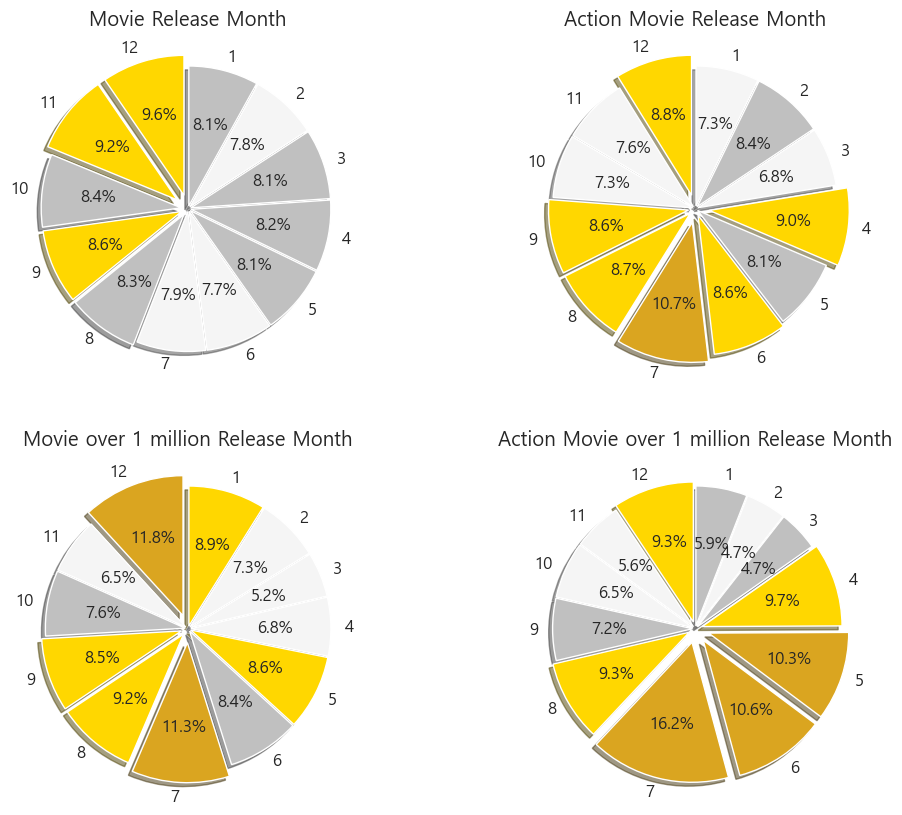

In [631]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

colors1 = ['silver','whitesmoke', 'silver','silver', 'silver','whitesmoke',
          'whitesmoke', 'silver','gold','silver','gold', 'gold']
explode1 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
          0.02, 0.05, 0.05, 0.05, 0.1, 0.1]
ax1.pie(movie_month_num, labels = movie_month, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors1,
        explode = explode1, shadow = True)

colors2 = ['whitesmoke','silver', 'whitesmoke','gold', 'silver','gold',
          'goldenrod', 'gold', 'gold','whitesmoke','whitesmoke','gold']
explode2 = [0.02, 0.02, 0.02, 0.1, 0.02, 0.05,
          0.1, 0.05, 0.05, 0.02, 0.02, 0.1]
ax2.pie(action_month_num, labels = action_month, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors2,
        explode = explode2, shadow = True)


colors3 = ['gold','whitesmoke', 'whitesmoke','whitesmoke','gold', 'silver',
          'goldenrod','gold','gold','silver','whitesmoke', 'goldenrod']
explode3 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
          0.1, 0.05, 0.05, 0.02, 0.02, 0.1]
ax3.pie(million_month, labels = million_month.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors3,
        explode = explode3, shadow = True)

colors4 = ['silver','whitesmoke', 'silver','gold', 'goldenrod','goldenrod',
          'goldenrod','gold', 'silver','whitesmoke','whitesmoke', 'gold']
explode4 = [0.02, 0.02, 0.02, 0.05, 0.1, 0.1,
          0.1, 0.05, 0.02, 0.02, 0.02, 0.05]
ax4.pie(million_action_month, labels = million_action_month.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors4,
        explode = explode4, shadow = True)


ax1.set_title('Movie Release Month')
ax2.set_title('Action Movie Release Month')
ax3.set_title('Movie over 1 million Release Month')
ax4.set_title('Action Movie over 1 million Release Month')

plt.show()

## 개봉요일

In [579]:
# 액션영화 개봉요일
action_day_num = action.groupby('개봉요일').size()
action_day = action.groupby('개봉요일').size().index

In [580]:
# 관객수 100만 이상 영화
million = movie_cum[movie_cum.누적관객수>=1000000]
million_day = million.groupby('개봉요일').size()

# 액션, 관객수 100만 이상 영화
million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]
million_action_day = million_action.groupby('개봉요일').size()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5240\928491616.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]


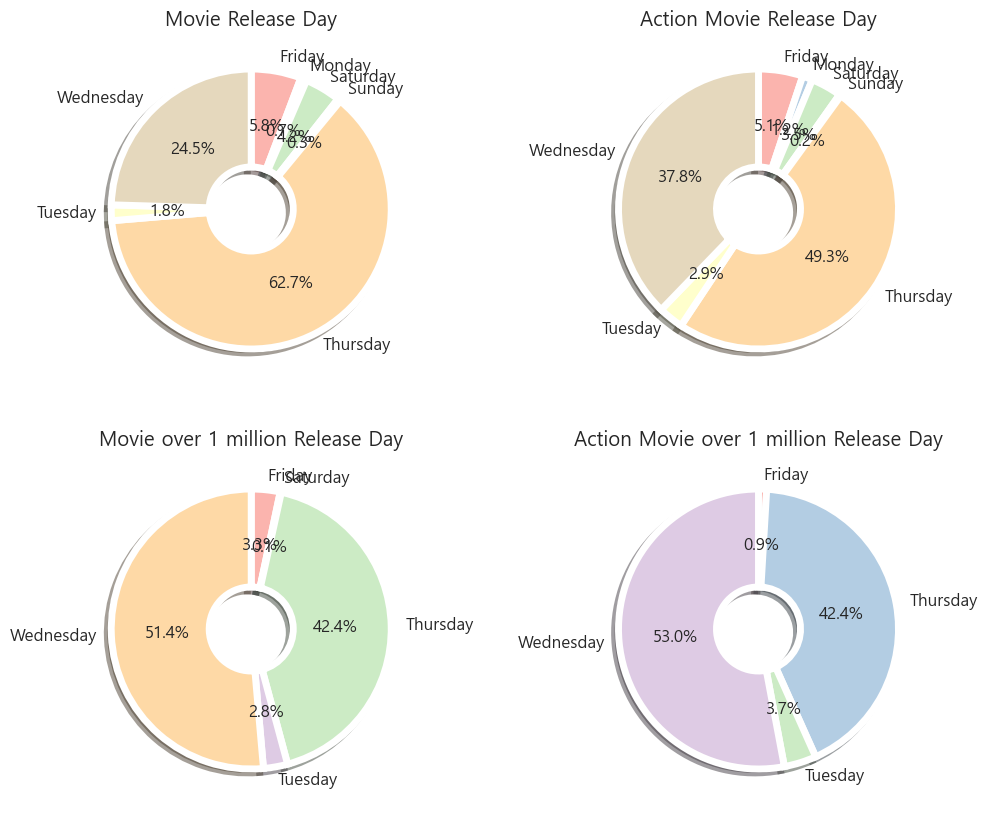

In [581]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# colors = ['#ff9999','#ffc000','#d395d0', '#99FF66','#66CCFF']
colors = sns.color_palette('Pastel1')
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

ax1.pie(movie_day_num, labels = movie_day, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors,
        shadow = True, wedgeprops = wedgeprops)
ax2.pie(action_day_num, labels = action_day, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors,
        shadow = True, wedgeprops = wedgeprops)
ax3.pie(million_day, labels = million_day.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors =colors,
        shadow = True, wedgeprops = wedgeprops)
ax4.pie(million_action_day, labels = million_action_day.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors =colors,
        shadow = True, wedgeprops = wedgeprops)

ax1.set_title('Movie Release Day')
ax2.set_title('Action Movie Release Day')
ax3.set_title('Movie over 1 million Release Day')
ax4.set_title('Action Movie over 1 million Release Day')
plt.show()

## 개봉일차

In [529]:
Movies.개봉일차.describe()

count    482752.000000
mean         44.196608
std          59.616121
min           1.000000
25%          11.000000
50%          27.000000
75%          53.000000
max         889.000000
Name: 개봉일차, dtype: float64

In [531]:
Movies[Movies.장르.str.contains('액션')].개봉일차.describe()

count    70837.000000
mean        32.428985
std         36.969407
min          1.000000
25%          9.000000
50%         21.000000
75%         43.000000
max        427.000000
Name: 개봉일차, dtype: float64

In [567]:
Actions = Movies[Movies.장르.str.contains('액션')]
Actions_name = Actions.영화명.unique()

In [554]:
Actions.sort_values(['영화명','관객수'],ascending = False)

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,누적매출액,관객수,누적관객수,스크린수,상영횟수,개봉월,개봉요일,누적상영횟수,개봉일차,등급s
482742,10,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,...,97502000,3894,14760,84,239,8,Wednesday,568,4,청소년관람불가
482740,11,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,...,48190500,3796,7367,91,374,8,Wednesday,768,2,청소년관람불가
482739,11,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,...,23401000,3571,3571,91,394,8,Wednesday,394,1,청소년관람불가
482741,11,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,...,71781500,3499,10866,90,329,8,Wednesday,703,3,청소년관람불가
482743,10,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,...,120736500,3388,18148,90,239,8,Wednesday,478,5,청소년관람불가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,100,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,...,12006432680,8,1229325,1,3,9,Wednesday,5,56,12세이상관람가
255,107,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,...,12009764680,4,1229965,1,1,9,Wednesday,8,58,12세이상관람가
252,101,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,...,12006359680,3,1229317,1,2,9,Wednesday,4,55,12세이상관람가
256,99,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,...,12009824680,3,1229968,1,1,9,Wednesday,2,59,12세이상관람가


## 개봉연도

In [582]:
# 관객수 100만 이상 영화
million = movie_cum[movie_cum.누적관객수>=1000000]
million_year = million.groupby('개봉연도').size()

# 액션, 관객수 100만 이상 영화
million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]
million_action_year = million_action.groupby('개봉연도').size()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5240\3189969486.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  million_action = movie_cum[movie_cum.장르.str.contains('액션')][movie_cum.누적관객수>=1000000]


In [586]:
Year = pd.concat([pd.DataFrame(million_year), pd.DataFrame(million_action_year)], axis = 1)
Year.columns = ['전체영화','액션영화']
Year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2003 to 2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전체영화    20 non-null     int64  
 1   액션영화    19 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [595]:
Year.dropna(inplace = True)
Year.액션영화 = Year.액션영화.astype('int64')

In [600]:
Year['비율'] = Year.액션영화 / Year.전체영화

In [601]:
Year

,전체영화,액션영화,비율
개봉연도,,,
2004,25,2,0.080000
2005,37,10,0.270270
2006,31,13,0.419355
2007,40,12,0.300000
2008,42,25,0.595238
2009,39,21,0.538462
2010,41,14,0.341463
2011,42,19,0.452381
2012,51,18,0.352941


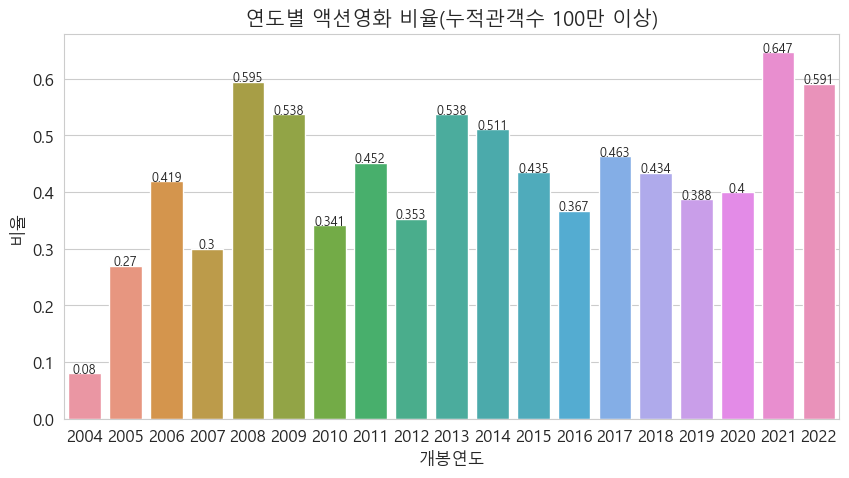

In [627]:
ax = sns.barplot(data = Year, x = Year.index, y = round(Year.비율,3))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, 
            height, ha = 'center', size = 9)    
plt.title('연도별 액션영화 비율(누적관객수 100만 이상)')
plt.show()